<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Support Vector Machines are some of the most popular machine learning models for their versatility and accuracy. Basically, they try to find the largest gap or __margin__ that separates a set of _linearly separable_ classes.

The margin limits are defined by “support vectors” that can be lines in the case of 2D, planes in the case of 3D or hyperplanes for higher dimensions.

In this lab, you will implement the code for two of the basic machine learning tasks: an SVM classifier and an SVM regressor, both linear and nonlinear cases.

__INSTRUCTIONS__: Refer to your lecture slides to complete the code requested in each text box.

## Linear SVM Classification

Import the necessary libraries for an SVM classifier.

You will need numpy, matplotlib.pyplot and some sklearn sublibraries like datasets, pipeline, standardscaler and linearSVC.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

Create and train an SVM classifier to classify the Iris dataset in either Iris virginica or not Iris virginica.

In [ ]:
iris = datasets.load_iris()
#Select the features of the dataset
X = iris["data"][:, (2,3)]
#Create a target variable y
y = (iris["target"] == 2).astype(np.float64)

#Create a pipeline to scale the data and apply a linear SVM classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

#Fit the pipeline to the data
svm_clf.fit(X, y)
#Predict the class of a given feature vector
svm_clf.predict([[5.5,1.7]])

array([1.])

Predict the species of two new datapoints (petal length, petal width):

$p_1 (6,2)$

$p_2 (1,0.5)$

In [ ]:
svm_clf.predict([[6,2]])

array([1.])

In [ ]:
svm_clf.predict([[1,0.5]])

array([0.])

## Nonlinear SVM Classification

Import the necessary libraries for a nonlinear svm classifier.

Use the __make_moons__ dataset and expand the dataset using Polynomial features.

Use the function below to plot the dataset:

```python
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

```

In [ ]:
def plot_dataset(X, y, axes):
    # Plot the data points X with label 0 in blue and label 1 in green
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    # Set the axis limits
    plt.axis(axes)
    # Add grid lines
    plt.grid(True, which='both')
    # Label the x-axis
    plt.xlabel(r"$x_1$", fontsize=20)
    # Label the y-axis
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

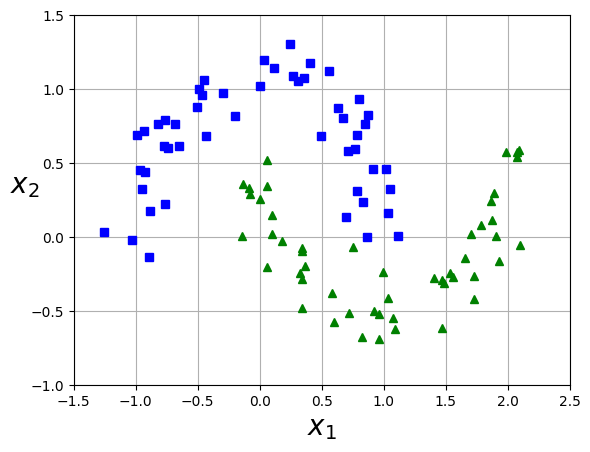

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# Create a dataset with 100 samples and 0.15 noise
X, y = make_moons(n_samples=100, noise=0.15)
# Create a pipeline with polynomial features, a scaler, and a linear SVC
polynomial_svm_clf = Pipeline([
           ("poly_features", PolynomialFeatures(degree=3)),
           ("scaler", StandardScaler()),
           ("svm_clf", LinearSVC(C=10, loss="hinge"))
            ])
# Fit the pipeline to the dataset
polynomial_svm_clf.fit(X, y)

# Plot the dataset with a range of x and y values
plot_dataset(X, y, [-1.5,2.5,-1.0,1.5])

Use the trained model to predict the class of the points:

$p_3 (2,0.5)$

$p_4 (0,1)$

In [ ]:
polynomial_svm_clf.predict([[2,0.5]])

array([1])

In [ ]:
polynomial_svm_clf.predict([[0,1]])

array([0])

## Nonlinear Polynomial Kernel Classification

Use the Kernel method in SVM to create and train a nonlinear classifier for the make moons dataset.

Predict the classification of the previous two datapoints using the new classifier.

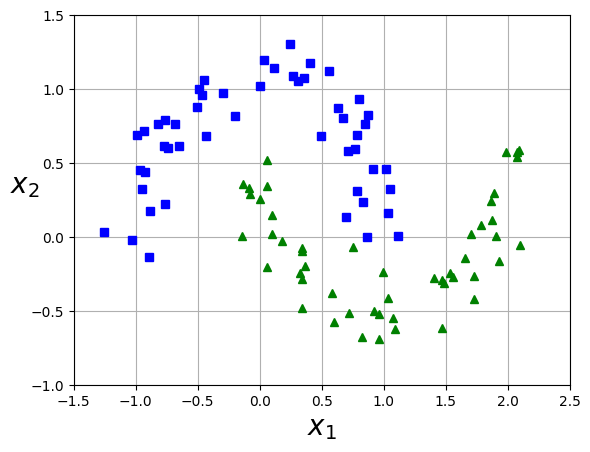

In [ ]:
from sklearn.svm import SVC

# Create a pipeline with a StandardScaler and an SVC with a polynomial kernel and C=5
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
# Fit the pipeline to the data
poly_kernel_svm_clf.fit(X, y)
# Plot the data with the pipeline
plot_dataset(X, y, [-1.5,2.5,-1.0,1.5])

In [ ]:
poly_kernel_svm_clf.predict([[2,0.5]])

array([1])

In [ ]:
polynomial_svm_clf.predict([[0,1]])

array([0])

## Linear SVM Regression

Generate a synthetic linear dataset. Refer to previous labs to find out how to create a linear dataset from a line with added noise.

In [ ]:
X = 2 * np.random.rand(100,1)
# Create a vector of 100 random values between 0 and 2
y = 5 + 4 * X + np.random.randn(100, 1)

Use SVM to create and train a regressor for the synthetic data you just created.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


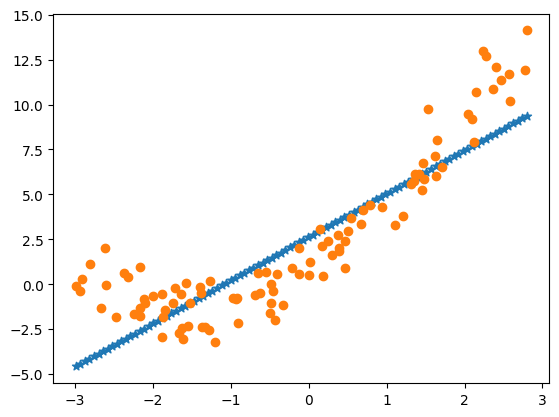

In [ ]:
from sklearn.svm import LinearSVR
#Create an SVM regressor
svm_reg = LinearSVR(epsilon=1.5)
#Fit the regressor to the data
svm_reg.fit(X,y)

#Create a range of values from the min to max of the X data
xmin=min(X)
xmax=max(X)

#Create an array of values from the min to max of the X data with 100 points
x = np.linspace(xmin,xmax,100).reshape(100,1)
#Predict the values of the array using the regressor
Y = svm_reg.predict(x)

#Print the intercept and coefficient of the regressor
svm_reg.intercept_,svm_reg.coef_
#Plot the values of the array and the data
plt.scatter(x,Y,marker="*")
plt.scatter(X,y)

## Nonlinear SVM Regression



Generate a synthetic nonlinear dataset. Refer to previous labs to find out how to create a quadratic (2nd order) dataset from a curve with added noise.

In [ ]:
m = 100
# Create an array of m random numbers between -3 and 3
X = 6 * np.random.rand(m,1) - 3
# Create an array of y values that are 2.5 times the X values plus 1 plus a random number
y = 0.7 * X**2 + 2.5 * X + 1 + np.random.randn(m, 1)

Use SVM to create and train a regressor for the synthetic data you just created. Remember to look at the degree of the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


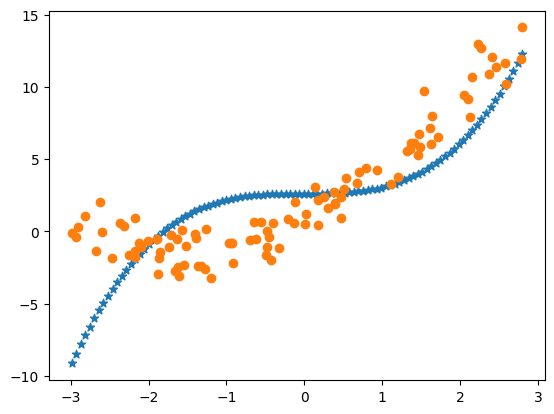

In [ ]:
from sklearn.svm import SVR

# Create an SVM regression model with a polynomial kernel
svm_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=0.1)

# Find the min and max values of the X data
xmin = min(X)
xmax = max(X)

# Fit the model to the data
svm_poly_reg.fit(X,y)

# Create a range of values from the min to max of the X data
newx = np.linspace(xmin,xmax,100).reshape(100,1)
# Use the model to predict the y values for the new x values
newY = svm_poly_reg.predict(newx)

# Plot the new x and y values
plt.scatter(newx,newY, marker="*")
plt.scatter(X,y)